In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
# -------------------------------
# Step 1: Generate a Sample Dataset
# -------------------------------
# We use 'make_blobs' to generate synthetic data with 300 samples, 4 centers, and 10 features.
# This higher-dimensional dataset will benefit from PCA visualization later.
X, y_true = make_blobs(n_samples=300, centers=4, n_features=10, random_state=42)

In [3]:
# -------------------------------
# Step 2: Apply K-Means Clustering
# -------------------------------
# Initialize the K-Means algorithm to find 4 clusters (matching the number of centers we generated).
kmeans = KMeans(n_clusters=4, random_state=42)
# Fit the model to our dataset and predict cluster labels for each sample.
labels = kmeans.fit_predict(X)
# 'kmeans.cluster_centers_' contains the centers of the clusters in the original 10-dimensional space.
centers = kmeans.cluster_centers_

C:\Users\S.A Computer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [4]:
# -------------------------------
# Step 3: Dimensionality Reduction using PCA
# -------------------------------
# We use PCA to reduce our 10-dimensional data to 2 dimensions for visualization.
pca = PCA(n_components=2)
# Transform the original data to its 2 principal components.
X_pca = pca.fit_transform(X)
# Also project the cluster centers to the 2D PCA space.
centers_pca = pca.transform(centers)


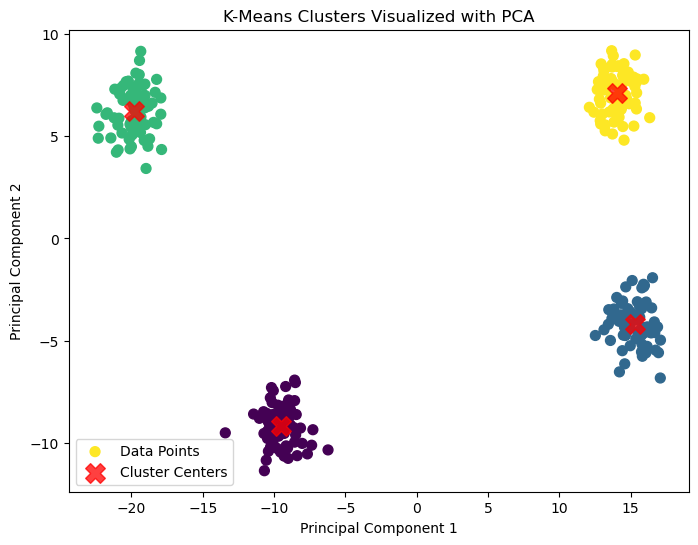

In [5]:
# -------------------------------
# Step 4: Visualize the Clusters and PCA Results
# -------------------------------
plt.figure(figsize=(8, 6))
# Scatter plot of the PCA-transformed data, color-coded by K-Means cluster labels.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=50, cmap='viridis', label='Data Points')
# Overlay the cluster centers on the scatter plot.
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Cluster Centers')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clusters Visualized with PCA")
plt.legend()
plt.show()

C:\Users\S.A Computer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


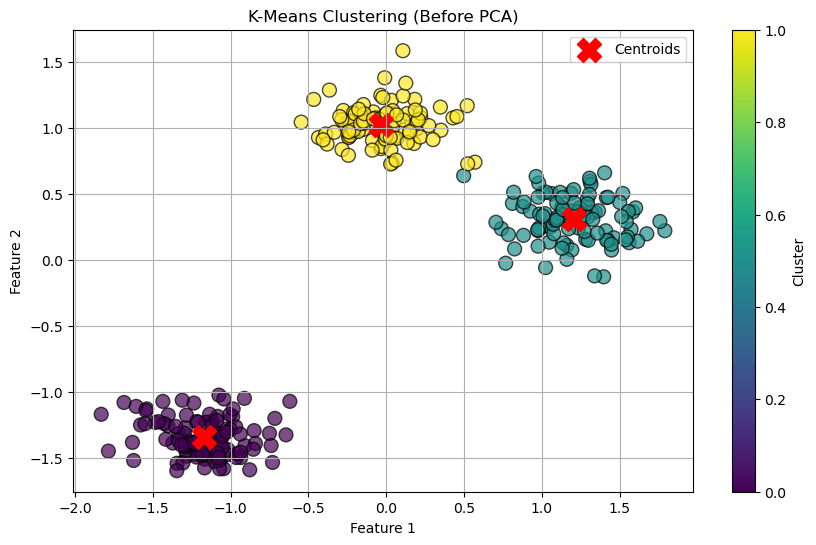

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Generate sample dataset
X, y = make_blobs(n_samples=300, centers=3, n_features=4, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means Clustering
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Plot clusters BEFORE PCA (Using first two features)
plt.figure(figsize=(10,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=100, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=300, label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering (Before PCA)')
plt.colorbar(label='Cluster')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Apply PCA for Dimensionality Reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Transform centroids to PCA space
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Plot clusters AFTER PCA
plt.figure(figsize=(10,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=100, alpha=0.7)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=300, label='Centroids')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering (After PCA)')
plt.colorbar(label='Cluster')
plt.legend()
plt.grid(True)
plt.show()
